In [1]:
import torch
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
X = torch.tensor(x).float()

y = [[3], [7], [11], [15]]
Y = torch.tensor(y).float()

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.itoh = nn.Linear(2, 8)
        self.htoo = nn.Linear(8, 1)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.itoh(x)
        x = self.activation(x)
        x = self.htoo(x)
        return x

In [7]:
net = MyNet().to(device)

In [8]:
criterion = nn.MSELoss()

In [ ]:
pred = net(X)

loss_val = criterion(pred, Y)
print(loss_val)

In [15]:
from torch.optim import SGD
opt = SGD(net.parameters(), lr = 0.001)

In [27]:
loss_history = []
for i in range(50):
    opt.zero_grad()
    pred = net(X)
    loss_value = criterion(pred, Y)
    loss_value.backward()
    opt.step()
    lv = loss_value.cpu().detach().numpy()
    loss_history.append(lv)

Text(0, 0.5, 'loss value')

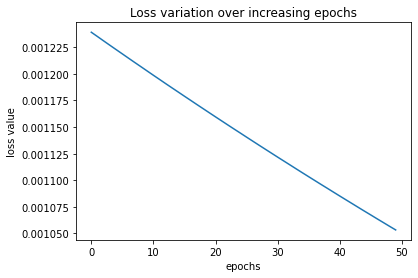

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')